#**Oscilador paramétrico: Juan Felipe Zapata Arenas 1214748144**

 Solución numérica cuando la 
frecuencia de la forzante varía en forma de diente de sierra

Generamos la función diente de cierra.

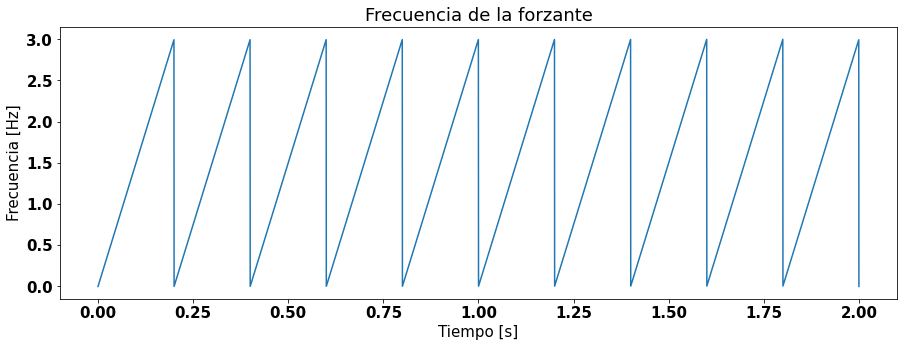

In [184]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import scipy.stats as stats
import matplotlib
from matplotlib import cm


plt.rcParams['figure.figsize'] = 15, 5 #ancho, alto
font = {'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

# INGRESO

# Rango en tiempo de la señal y muestras
a=0 #inicio del tiempo
b=2#final del tiempo
p = 5000 #partes en las que se va a partir el tiempo de análisis



# PROCEDIMIENTO
# simetria de la señal triangular diente de sierra


# Frecuencia de la señal en Hz
fs= 5 #número de picos por segundo.
simetria=1 
t = np.linspace(a, b, p)
senal = 1.5*(signal.sawtooth(2 * np.pi * fs * t, simetria)+1)

# SALIDA
plt.plot(t,senal)
plt.title('Frecuencia de la forzante')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.show()

In [161]:
print(len(senal))

5000


La resonancia paramétrica está caracterizada por la ecuación: $$\ddot{x}+\omega^{2}x=0$$

En donde $$\omega^{2}=\omega_{0}^{2}\left[1+h\cos\gamma t \right]x=0$$
Entonces: 

$$\boxed{\ddot{x}+\omega_{0}^{2}\left[1+h\cos\gamma t \right]x=0}$$

La frecuencia que vamos a variar como un diente de cierra es $\gamma$

#**Solución de la ecuación de movimiento**

$U=\begin{bmatrix}
   x \\
\dot{x}    
\end{bmatrix}=\begin{bmatrix}
   U[0] \\
U[1]    
\end{bmatrix}$;


 $\frac{dU}{dt}=\begin{bmatrix}
   \dot{x} \\
\ddot{x}    
\end{bmatrix}=\begin{bmatrix}
   \dot{x} \\
    -\omega_{0}^{2}\left[1+h\cos \gamma t\right]x
\end{bmatrix}=\begin{bmatrix}
   U[1] \\
    -\omega_{0}^{2}\left(1+h\cos \gamma t\right)U[0]
\end{bmatrix}$
    

Hay resonancia paramétrica si $\gamma$ pertenece al siguiente intervalo: 


$$\left( \frac{2\omega_{0}}{n}-\epsilon,\frac{2\omega_{0}}{n}+\epsilon \right)=\left(\frac{2\omega_{0}}{n}-\frac{n^{2n-3}h^{n}\omega_{0}}{2^{3n-2}[(n-1)!]^{2}} ,\frac{2\omega_{0}}{n}+\frac{n^{2n-3}h^{n}\omega_{0}}{2^{3n-2}[(n-1)!]^{2}}\right)$$

Es decir, el ancho de la región de inestabilidad es $$\Delta \epsilon=\frac{n^{2n-3}h^{n}\omega_{0}}{2^{3(n-1)}[(n-1)!]^{2}}$$

Por lo tanto se espera que a medida que $\gamma$ varíe como diente de cierra, en ciertos momentos muy cortos, se de resonancia paramétrica

#**Solución Numérica**

Hay resonancia paramétrica en algunos momentos


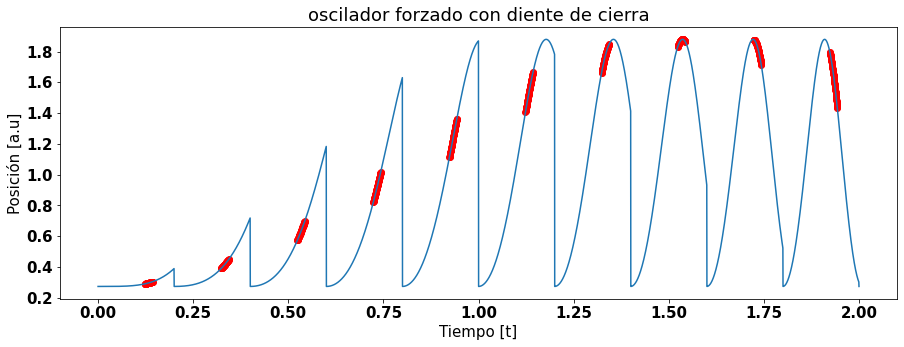

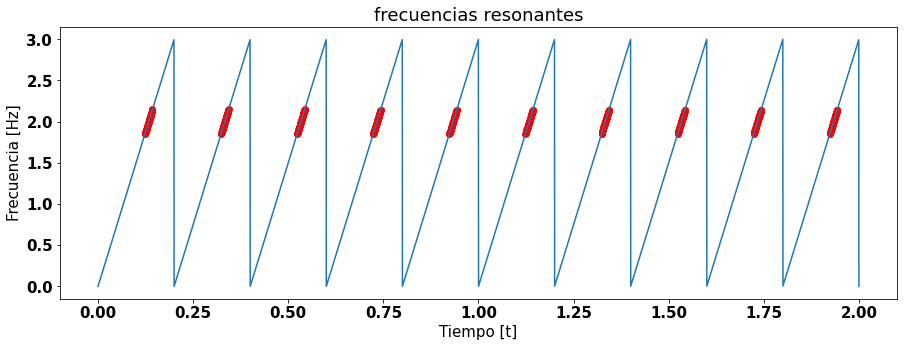

In [191]:
n=1

#Solución de la ecuación 

from math import *
from scipy.integrate import odeint

##########  Parámetros ####################

h=0.3
w=1
r=senal

E=(n**(2*n-3)*(h**n)*w)/((2**(3*n-2))*(factorial(n-1))**2)

####################

sol1=[]


for i in range (len(t)): 

  r=senal[i]
  T=t[i]


  def dU_dt(U,t):
    return [U[1],-(w**2)*(1+h*np.cos(r*T)*U[0])]



  ############ Condición inicial ###################

  U0 = [1,1]

  ############ Solución numérica #####################

  US1 = odeint(dU_dt,U0,t)

  US = []

  for i in range(len(t)):
    US.append([t[i],US1[i][0],US1[i][1]])

  US=np.array(US)
  U=np.transpose(US)

  sol1.append(U[1][i])
 

####################  Gráfica de la solución ######################

res1=[]
t1=[]

for i in range (len(sol1)): 
  if  (((2*w)/n)-E) < senal[i] < (((2*w)/n)+E):
    res1.append(sol1[i])
    t1.append(t[i])

  

if len(res1)==0: 
  print('Con los parámetros ingresados no hay resonancia paramétrica, sólo oscilaciones puras')

if len(res1)>=1: 

  print('Hay resonancia paramétrica en algunos momentos')

  for i in range (len(t1)): 
    plt.plot(t1[i],res1[i], marker="o", color="red")


plt.plot(t,sol1)
plt.xlabel('Tiempo [t]')
plt.ylabel('Posición [a.u]')
plt.title('oscilador forzado con diente de cierra')
plt.show()


####### grafica de diente de cierra  pero indicando aquellos valores de resonancia paramétrica

res=[]
t2=[]

for i in range (len(senal)): 
  if  (((2*w)/n)-E) < senal[i] < (((2*w)/n)+E):
    res.append(senal[i])
    t2.append(t[i])

for i in range (len(t1)): 
    plt.plot(t2[i],res[i], marker="o", color="red")



plt.plot(t,senal)
plt.xlabel('Tiempo [t]')
plt.ylabel('Frecuencia [Hz]')
plt.title('frecuencias resonantes')
plt.show()

#**Análisis de casos: n=1,2 y 3

In [195]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()


Saving c.png to c.png
Saving a.png to a.png
Saving b.png to b.png
Saving 11.png to 11 (1).png
Saving 22.png to 22 (1).png
Saving 33.png to 33 (1).png


Para todos los casos a continuación  se tomaron los parámetros: 

$$h=0.3$$
$$\omega_{0}=1$$

La función diente de cierra tiene un periodo de $\frac{1}{5}$, el valor máximo para la frecuencia $\gamma$ es 3Hz

**Si se quieren cambiar estos parámetros en el código de arriba se puede hacer sin ningún problema**

#**n=1**

Para que halla resonancia paramétrica $\gamma$ debe tomar valores cercanos a $2\omega_{0}$ dentro del ancho $\Delta \epsilon$ específico para este caso. 

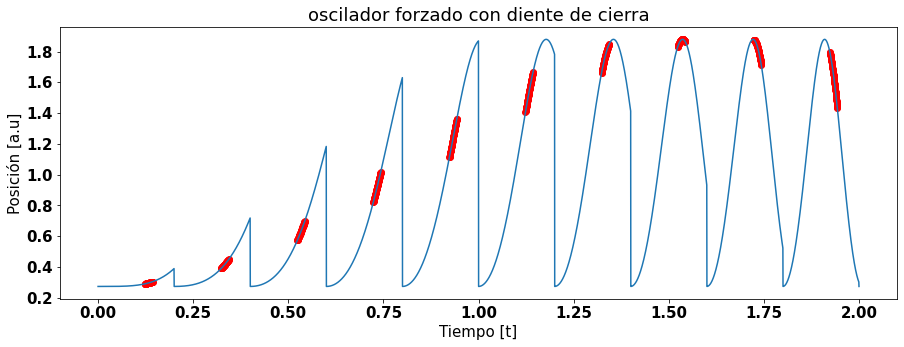

In [196]:
Image('a.png', width = 1000)

Los puntos rojos indican los momentos en los cuáles se presenta resonancia paramétrica, vemos que estos son aproximandamente periódicos debido a la función diente de cierra. Para este caso con $n=1$ tenemos el mayor número de frecuencias de la forzante que generan resonancia paramétrica, pues a medida que $n$ aumenta disminuye el ancho $\Delta \epsilon$ de la región de inestabilidad.

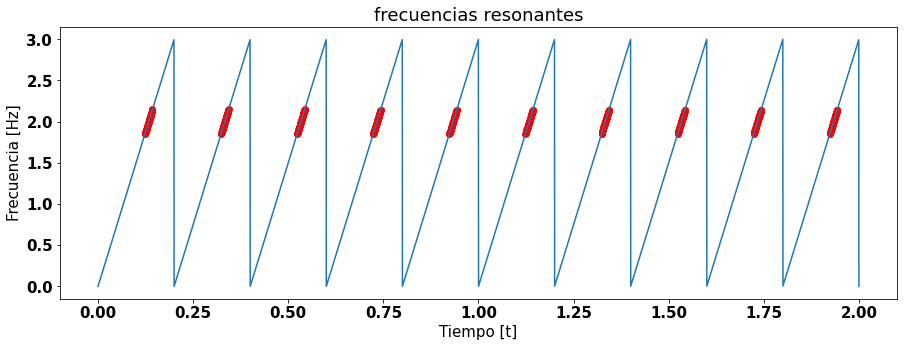

In [197]:
Image('11.png', width = 1000)

En rojo los valores de las frecuencias $\gamma$ que están dentro del intervalo de inestabilidad, vemos que están alrededor de 2, que es valor que toma en este caso $2\omega_{0}$

#**n=2**

En este caso para que halla resonancia paramétrica $\gamma$ debe tomar valores cercanos a $\omega_{0}$ dentro del ancho $\Delta \epsilon$ específico para este caso. 

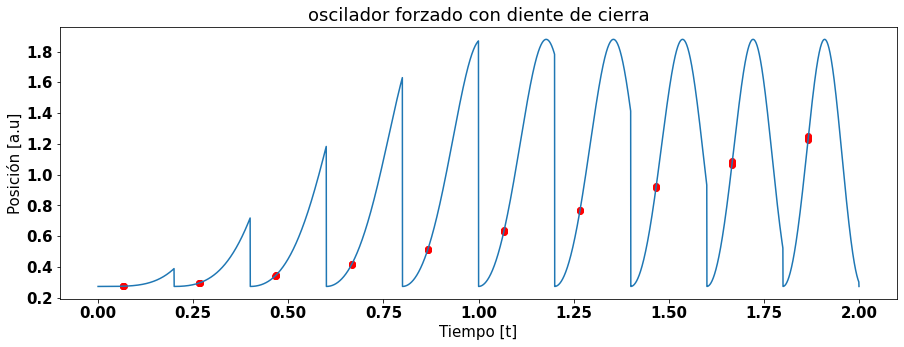

In [198]:
Image('b.png', width = 1000)

El número de veces que se presenta resonancia es menor, pues el ancho de inestabilidad ha disminuido, y las frecuencias $\gamma$ que están en este intervalo son pocas, se observa también un comportamiento de resonancia periódico debido a la forma del diente de cierra. 

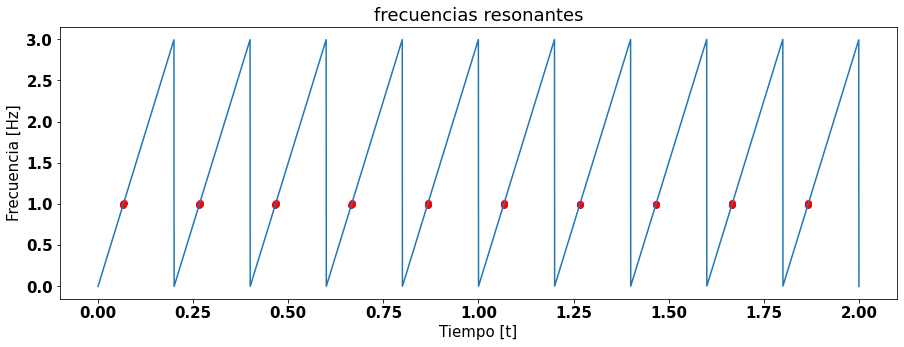

In [199]:
Image('22.png', width = 1000)

Como es de esperarse los valores de $\gamma$ para los que hay resonancia están alrededor del valor 1, que es el valor que en este caso toma $\omega_{0}$

#**n=3**

Para que halla resonancia paramétrica $\gamma$ debe tomar valores cercanos a $\frac{2}{3}\omega_{0}$ dentro del ancho $\Delta \epsilon$ específico para este caso. 

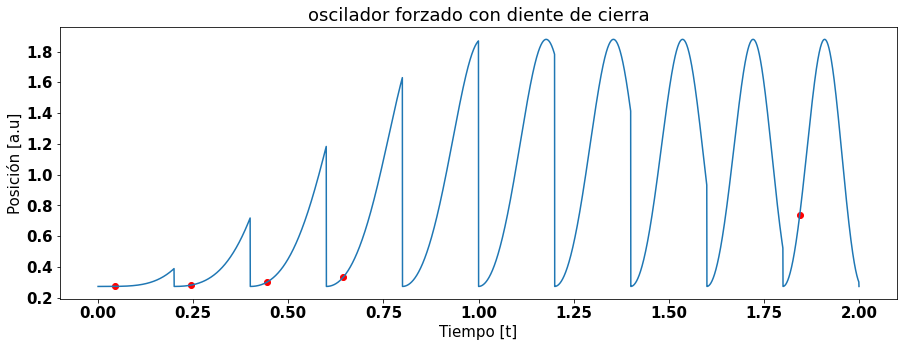

In [200]:
Image('c.png', width = 1000)

Análogo a los análisis anteriores $\Delta \epsilon$ se está haciendo tan pequeño, que las frecuencias $\gamma$ dentro del intervalo de resonancia son muy pocas en este caso sólo 1 por periodo. **Deberían aparecer otros puntos periódicamente, pero el código no los pone, no sé porqué** 

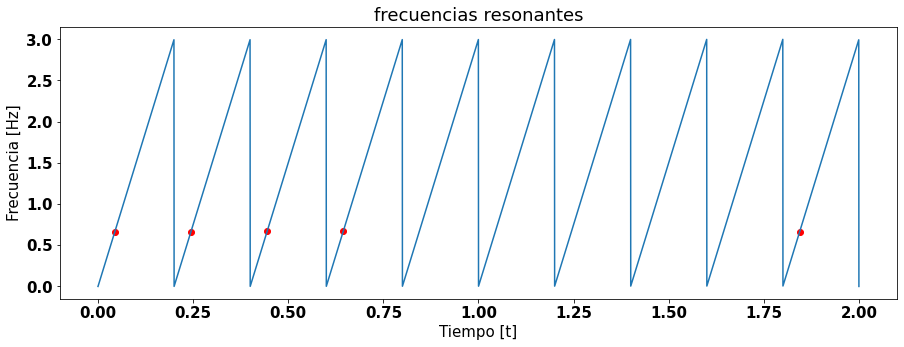

In [201]:
Image('33.png', width = 1000)

vemos que la frecuencia de resonancia es cercana a $0.7$ que es valor que toma $\frac{2}{3}\omega_{0}$. **Deberían aparecer otros puntos periódicamente, pero el código no los pone, no sé porqué** 